<a href="https://colab.research.google.com/github/ntrigo-tech/Proyecto-CoderHouse/blob/main/Estudio_de_Usuarios_en_Roaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio de Usuarios en Roaming
## Introducción
El presente proyecto tiene por objeto brindar un seguimiento y medición de usuarios en Roaming (Clientes de Claro Argentina- Uruguay y Paraguay usando el teléfono celular en otras partes del mundo) y determinar mediante el estudio de un dataset que es sacado de una plataforma de
steering de roaming, que es una herramienta que utilizan los operadores de telefonía móvil para gestionar y optimizar el proceso de selección de red cuando un abonado se encuentra en roaming. El objetivo principal de estas plataformas es mejorar la experiencia del usuario al garantizar que se conecte a la red que ofrece la mejor calidad de servicio, el menor costo o la combinación de ambos. O prohibirle el acceso si no tiene habilitado el servicio.
La satisfacción del servicio y la lealtad del cliente pueden determinar el éxito y las pérdidas y ganancias del roaming dentro de un entorno de operador móvil. La mayor preocupación que puede enfrentar un administrador de Roaming es cómo medir, predecir y responder a los desafíos del Roaming para transformarlos en oportunidades de negocio. Sólo contando con la información correcta podrán ofrecer servicios de roaming de alta calidad con una experiencia agradable para el cliente.

Del análisis del dataset se determinará cuantos abonados se encuentran en roaming y en que país, en base al análisis de métrícas e indicadores entregados por la plataforma de steering se determinará si el usuario está usando una red con buen SQI (Service Quality Index, es una métrica utilizada por los operadores de telecomunicaciones para medir y evaluar la calidad de servicio (QoS) de sus redes. SQI proporciona una evaluación integral de varios aspectos del rendimiento de la red)
Los puntajes de calidad de servicio individuales se definen como SSI (Indicador de Servicio Único), que representa la calidad de los datos, voz, SMS, con el registro de servicios calculado para cada red y por usuario.



# Detecciones y casos de uso

Por ejemplo trataremos en este proyecto detectar posibles escenarios:

- Si se detecta que un cliente VIP o nó esta usando una red de baja calidad se le puede ofrecer otrá ya sea contactando al cliente u derivarlo a otra red de manera automática.
- Si se detecta gran flujo de usuarios en una red de baja calidad se puede realizar el reclamo de manera proactiva al operador de la red visitada antes que reclamen los usuarios.
- Si se detecta que hay usuarios que están intentando acceder a una determinada red y son continuamente rechazados, se puede ofrecer al cliente una determinada red, de esa forma la operadora genera nuevos ingresos.
- Si el usuario/s estan usando datos en una red 3G, tratar de ofrecerle una red LTE de mayor velocidad si es posible.

En resumen trataremos de determinar si un usuario o un grupo de usuarios en Roaming van a tener un buen servicio o nó. En Base a su perfil de abonado y los parámetros de medición de performance SSI.


# Carga del DataSet

## Se comentan las líneas y despues se levanta el dataset quitando los duplicados ya que el DS original tiene alrededor de 200Mb haciendo el Notebook muy lento.

<div>
    <div class = "mapa">
        <img src='https://raw.githubusercontent.com/ntrigo-tech/Proyecto-CoderHouse/main/df_original.JPG' alt="Impacto" width=50% height=60% align="center">
    </div>
</div>

In [1]:
## El archivo crudo tiene un tamaño de 198Mb se tratará de eliminar filas con suscriptores duplicados y columnas que no aportan información o tienen info privada ##
'''
import pandas as pd

## cargar el data set desde mi pc file Roaming_310524.csv ##
from google.colab import files
uploaded = files.upload()
'''

'\nimport pandas as pd\n\n## cargar el data set desde mi pc file Roaming_310524.csv ##\nfrom google.colab import files\nuploaded = files.upload()\n'

In [2]:
'''
df_crudo = pd.read_csv("Roaming_310524.csv",sep=",")
df_crudo
'''

'\ndf_crudo = pd.read_csv("Roaming_310524.csv",sep=",")\ndf_crudo\n'

In [3]:
'''
df_crudo.shape
'''

'\ndf_crudo.shape\n'

In [4]:
'''
df_crudo.columns
'''

'\ndf_crudo.columns\n'

# Procesamiento del DataSet

## Dejando solo las columnas deseadas
El DS se obtuvo en diferentes horas de la mañana de un día normal, que no tenga eventos de red que puedan afectar las mediciones, los datos están disponibles de manera on-line.
La Tabla de SQI/SSI/ throughput_av_trip/latency_process/RSSI/SNR se trae de otros files bajados de la plataforma de steering
La Tabla de coordenadas de países se baja de internet

### Columnas de interes para este estudio:

- AppliedCosID y AppliedCosName --> Referidas al tipo de suscriptor (VIP, GPRS,AVL)
- HomeName, HomeMCC y HomeMNC --> referidos al nombre de Red local
- IMSI --> Identificación del usuario asociado a su SIM Card y operador
- ReasonCode y ReasonCodeDesc --> Referencia al tipo de red usada (2G-3G-Forbiden)
- VisitedNwName y VisitedZoneID --> Nombre y ID de la red visitada (MEX-FRA-CHI)
- Retry_Count (reintentos de acceso)
- SQI (Índice de calidad del servicio)
- Voice SSI: Measures the performance of voice
- Data SSI: Measures the performance of data
- rsrp_signal : intensidad general de la señal recibida por el dispositivo
- Reg SSI: Measures the performance of registration
- TrTxnPeriod: Duration since the transaction started
- throughput_av_trip: Mbps usados en promedio
- latency_process: La latencia total de extremo a extremo en una red


In [5]:
""" Remuevo duplicados en la columna IMSI esto es porque hay varios intentos de registración o location updates del mismo IMSI
el recuento de intentos está calculado en el campo Retry_Count

df_crudo['Retry_Count'] = df_crudo.groupby('IMSI')['IMSI'].transform('size')
df_crudo = df_crudo.drop_duplicates(subset='IMSI')
df_crudo[['IMSI','Retry_Count']]
"""

" Remuevo duplicados en la columna IMSI esto es porque hay varios intentos de registración o location updates del mismo IMSI\nel recuento de intentos está calculado en el campo Retry_Count\n\ndf_crudo['Retry_Count'] = df_crudo.groupby('IMSI')['IMSI'].transform('size')\ndf_crudo = df_crudo.drop_duplicates(subset='IMSI')\ndf_crudo[['IMSI','Retry_Count']]\n"

In [6]:
'''
df_crudo.shape
'''

'\ndf_crudo.shape\n'

In [7]:
## Arranco desde acá si quiero con el archivo sin filas duplicadas ##
## Empezar desde el principio tarda mucho el archivo es de aprox 198 Mb ##
import pandas as pd
#df_crudo.to_excel("data_export_Roaming_sin_dupli.xlsx", index=False)

In [8]:
df_sel = pd.read_excel("https://raw.githubusercontent.com/ntrigo-tech/Proyecto-CoderHouse/main/data_export_Roaming_sin_dupli.xlsx")

In [9]:
## dropeo columnas que no interesan ##
## Seleccionar las columnas deseadas ##
df_sel = df_sel[['AppliedCosID', 'AppliedCosName','HomeName','HomeMCC','HomeMNC','IMSI','ReasonCode','ReasonCodeDesc',
             'VisitedNwName','VisitedZoneID','VisitedZoneName','Retry_Count','VisitedZoneName3L','TrTxnPeriod']]

In [10]:
df_sel

,AppliedCosID,AppliedCosName,HomeName,HomeMCC,HomeMNC,IMSI,ReasonCode,ReasonCodeDesc,VisitedNwName,VisitedZoneID,VisitedZoneName,Retry_Count,VisitedZoneName3L,TrTxnPeriod
0,326,zonedefault,AMX Argentina S.A.,722,310,722310125924791,73,First time GPRS UL,Vivo S.A.,326,Brazil,2,BRA,144
1,326,zonedefault,AMX Argentina S.A.,722,310,722310025718653,73,First time GPRS UL,Vivo S.A.,326,Brazil,2,BRA,125
2,395,zonedefault,AMX Argentina S.A.,722,310,722310089687797,73,First time GPRS UL,Vodafone Omnitel N.V.,395,Italy,5,ITA,181
3,395,zonedefault,AMX Argentina S.A.,722,310,722310075971701,73,First time GPRS UL,Vodafone Omnitel N.V.,395,Italy,2,ITA,22
4,310,zonedefault,AMX Argentina S.A.,722,310,722310045084623,73,First time GPRS UL,Singtel Optus Limited,310,Australia,84,AUS,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27015,339,zonedefault,AMX Argentina S.A.,722,310,722310046466679,35,GSM UL allowed because of GPRS attach,Claro Chile SA,339,Chile,1,CHL,0
27016,365,zonedefault,AMX Argentina S.A.,722,310,722310126763314,35,GSM UL allowed because of GPRS attach,Bouygues Telecom,365,France,1,FRA,0
27017,339,zonedefault,AMX Argentina S.A.,722,310,722310059107837,35,GSM UL allowed because of GPRS attach,Claro Chile SA,339,Chile,1,CHL,0
27018,326,zonedefault,AMX Argentina S.A.,722,310,722310039385615,35,GSM UL allowed because of GPRS attach,Claro,326,Brazil,1,BRA,0


In [11]:
df_sel.shape

(27020, 14)

In [12]:
df_sel.columns

Index(['AppliedCosID', 'AppliedCosName', 'HomeName', 'HomeMCC', 'HomeMNC',
       'IMSI', 'ReasonCode', 'ReasonCodeDesc', 'VisitedNwName',
       'VisitedZoneID', 'VisitedZoneName', 'Retry_Count', 'VisitedZoneName3L',
       'TrTxnPeriod'],
      dtype='object')

## Agrego una columna con las coordenadas geográficas (el archivo se descarga de: https://www.kaggle.com/datasets/juanmah/world-cities)

In [13]:
datos= pd.read_csv("https://raw.githubusercontent.com/ntrigo-tech/Proyecto-CoderHouse/main/worldcities.csv")

In [14]:
datos

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
47863,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139


In [15]:
## Función get_coordenadas dado como argumento un pais en formato 3L (letras) devuelve las coordenadas ##
def get_coordenadas(country_name):
    try:
        country_data = datos[datos['iso3'] == country_name]
        # Extract the latitude and longitude coordinates
        latitude = country_data['lat'].values[0]
        longitude = country_data['lng'].values[0]
        return latitude, longitude
    except Exception:
        # Handle any errors that occur during the search
        #print(f"Error finding coordinates for country: {country_name}")
        return None


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
## Agrego las columnas de coordenadas al DS pasando el pais en formato 3 letras ##
data = df_sel

for index, row in data.iterrows():
  try:
      # Get the country name from the current row
      country_name = row['VisitedZoneName3L']
      latitude,longitude = get_coordenadas(country_name)
      # Add the latitude and longitude to the 'coordinates' column
      data.loc[index, 'VisitedLatitude'] = f"{latitude}"
      data.loc[index, 'VisitedLongitude'] = f"{longitude}"
  except:
      data.loc[index, 'VisitedLatitude'] =None
      data.loc[index, 'VisitedLongitude'] =None

In [18]:
data[['VisitedLatitude','VisitedLongitude','VisitedZoneName']]

,VisitedLatitude,VisitedLongitude,VisitedZoneName
0,-23.55,-46.6333,Brazil
1,-23.55,-46.6333,Brazil
2,41.8933,12.4828,Italy
3,41.8933,12.4828,Italy
4,-37.8142,144.9631,Australia
...,...,...,...
27015,-33.4372,-70.6506,Chile
27016,48.8567,2.3522,France
27017,-33.4372,-70.6506,Chile
27018,-23.55,-46.6333,Brazil


## Convirtiendo datos númericos

In [19]:
data.dtypes

AppliedCosID         object
AppliedCosName       object
HomeName             object
HomeMCC              object
HomeMNC              object
IMSI                 object
ReasonCode           object
ReasonCodeDesc       object
VisitedNwName        object
VisitedZoneID        object
VisitedZoneName      object
Retry_Count           int64
VisitedZoneName3L    object
TrTxnPeriod          object
VisitedLatitude      object
VisitedLongitude     object
dtype: object

In [20]:
## Pasando columnas a numericas ##

data['IMSI'] = pd.to_numeric(data['IMSI'], errors='coerce')
data = data.dropna(subset=['IMSI'])
data['IMSI'].astype(int)

data['ReasonCode'] = pd.to_numeric(data['ReasonCode'], errors='coerce')
data['ReasonCode'].astype(int)

data['VisitedZoneID'] = pd.to_numeric(data['VisitedZoneID'], errors='coerce')
data['VisitedZoneID'].astype(int)


0        326
1        326
2        395
3        395
4        310
        ... 
27015    339
27016    365
27017    339
27018    326
27019    483
Name: VisitedZoneID, Length: 27019, dtype: int64

In [21]:
data['HomeMNC'] = pd.to_numeric(data['HomeMNC'], errors='coerce')
data['HomeMNC'].astype(int)

data['HomeMCC'] = pd.to_numeric(data['HomeMCC'], errors='coerce')
data['HomeMCC'].astype(int)

data['Retry_Count'] = pd.to_numeric(data['Retry_Count'], errors='coerce')
data['Retry_Count'].astype(int)

data['TrTxnPeriod'] = pd.to_numeric(data['TrTxnPeriod'], errors='coerce')
data['TrTxnPeriod'].astype(int)

data.dtypes

AppliedCosID          object
AppliedCosName        object
HomeName              object
HomeMCC                int64
HomeMNC                int64
IMSI                 float64
ReasonCode             int64
ReasonCodeDesc        object
VisitedNwName         object
VisitedZoneID          int64
VisitedZoneName       object
Retry_Count            int64
VisitedZoneName3L     object
TrTxnPeriod            int64
VisitedLatitude       object
VisitedLongitude      object
dtype: object

## Agrego Columnas de Calidad de Servicio del archivo txn_imsi_detailed_3.xlsx bajado de la plataforma de steering

In [22]:
txnd = pd.read_excel("https://raw.githubusercontent.com/ntrigo-tech/Proyecto-CoderHouse/main/txn_imsi_detailed_3.xlsx")
'''
from google.colab import files
uploaded = files.upload()
txnd = pd.read_excel("txn_imsi_detailed_2.xlsx")
'''

'\nfrom google.colab import files\nuploaded = files.upload()\ntxnd = pd.read_excel("txn_imsi_detailed_2.xlsx")\n'

In [23]:
txnd.dtypes

IMSI                    int64
latency_process       float64
SQI                   float64
SSI_Voice             float64
SSI_Data              float64
rsrp_signal           float64
SSI_Reg               float64
throughput_av_trip    float64
SNR                    object
RSSI                   object
dtype: object

In [24]:
## funcion dado un IMSI devuelve los datos del file de calidad de servicio ##
import re
def get_txn(imsi,reasonCode):
    try:

      if reasonCode == 79:
        return 0
      else:
        d_imsi = txnd[txnd['IMSI'] == imsi]
        # Extract the latitude and longitude coordinates
        sqi = d_imsi['SQI'].values[0]
        voice = d_imsi['SSI_Voice'].values[0]
        rsrp = d_imsi['rsrp_signal'].values[0]
        dat = d_imsi['SSI_Data'].values[0]
        reg = d_imsi['SSI_Reg'].values[0]
        th = d_imsi['throughput_av_trip'].values[0]
        lat= d_imsi['latency_process'].values[0]
        snr = d_imsi['SNR'].values[0]
        rssi= d_imsi['RSSI'].values[0]
        return sqi,voice,rsrp,dat,reg,th,lat,snr,rssi
    except Exception:
        # Handle any errors that occur during the search
        #print(f"Error finding imsi: {d_imsi}")
        return 0

In [25]:
## Prueba de la función ##
get_txn(722310069976800,data.ReasonCode[2])

(6.6469852941176475,
 7.433088235294117,
 10.793823529411766,
 2.073000000715256,
 9.219263095238095,
 1.5246824128409435,
 42.14844972365856,
 -4,
 -94)

In [26]:
## Agrego las columnas de calidad de servicio al DS original pasando el imsi ##
data_ssi = data
for index, row in data_ssi.iterrows():
  try:
      iMSI = row['IMSI']
      iRC = row['ReasonCode']
      sqi,voice,rsrp,dat,reg,th,lat,snr,rssi = get_txn(iMSI,iRC)
      data_ssi.loc[index, 'SQI'] = f"{sqi}"
      data_ssi.loc[index, 'SSI_Voice'] = f"{voice}"
      data_ssi.loc[index, 'rsrp_signal'] = f"{rsrp}"
      data_ssi.loc[index, 'SSI_Data'] = f"{dat}"
      data_ssi.loc[index, 'SSI_Reg'] = f"{reg}"
      data_ssi.loc[index, 'throughput_av_trip'] = f"{th}"
      data_ssi.loc[index, 'latency_process'] = f"{lat}"
      data_ssi.loc[index, 'SNR'] = f"{snr}"
      data_ssi.loc[index, 'RSSI'] = f"{rssi}"
  except:
      data_ssi.loc[index, 'SQI'] =0
      data_ssi.loc[index, 'SSI_Voice'] =0
      data_ssi.loc[index, 'rsrp_signal'] = 0
      data_ssi.loc[index, 'SSI_Data'] = 0
      data_ssi.loc[index, 'SSI_Reg'] = 0
      data_ssi.loc[index, 'throughput_av_trip'] = 0
      data_ssi.loc[index, 'latency_process'] = 0
      data_ssi.loc[index, 'throughput_av_trip'] = 0
      data_ssi.loc[index, 'latency_process'] = 0
      data_ssi.loc[index, 'SNR'] = 0
      data_ssi.loc[index, 'RSSI'] = 0


In [27]:
data_ssi[['IMSI','SQI','SSI_Voice','SSI_Data','rsrp_signal','SSI_Reg','latency_process']]

,IMSI,SQI,SSI_Voice,SSI_Data,rsrp_signal,SSI_Reg,latency_process
0,7.223101e+14,7.744191176470588,0.0,0.741999998241663,12.023970588235294,2.4658488095238096,175.54317990001283
1,7.223100e+14,4.357205882352941,5.369926470588235,12.2325,7.875808823529411,8.406640873015872,33.72680264683926
2,7.223101e+14,4.903455882352941,0.0,6.451499972343445,8.651544117647058,5.795417857142857,53.74169661492568
3,7.223101e+14,6.4262500000000005,0.0,8.426500029563906,9.907720588235295,3.8669704365079367,92.23704888175153
4,7.223100e+14,4.855217086834735,5.980257856567285,10.99107149669102,8.375787815126051,2.51546485260771,119.8698367945599
...,...,...,...,...,...,...,...
27015,7.223100e+14,6.612794117647059,0.0,4.761000003814697,10.72404411764706,8.582986904761905,44.9803305678006
27016,7.223101e+14,6.814044117647059,0.0,1.66499999538064,11.372352941176471,4.615162896825397,88.70861441618185
27017,7.223101e+14,4.37875,7.091323529411764,9.93000002861023,7.827720588235294,11.685702182539682,24.11476321872399
27018,7.223100e+14,6.402135854341736,0.0,8.86249998637608,9.624387254901961,4.19797193877551,82.53460152416679


In [28]:
## Exporto dataset procesado ##
#data_ssi.to_excel("data_export_Roaming_seleccion3.xlsx", index=False)

In [29]:
df=data_ssi

In [30]:
'''
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("data_export_Roaming_seleccion3.xlsx")
'''

'\nimport pandas as pd\nfrom google.colab import files\nuploaded = files.upload()\ndf = pd.read_excel("data_export_Roaming_seleccion3.xlsx")\n'

In [31]:
df

,AppliedCosID,AppliedCosName,HomeName,HomeMCC,HomeMNC,IMSI,ReasonCode,ReasonCodeDesc,VisitedNwName,VisitedZoneID,...,VisitedLongitude,SQI,SSI_Voice,rsrp_signal,SSI_Data,SSI_Reg,throughput_av_trip,latency_process,SNR,RSSI
0,326,zonedefault,AMX Argentina S.A.,722,310,7.223101e+14,73,First time GPRS UL,Vivo S.A.,326,...,-46.6333,7.744191176470588,0.0,12.023970588235294,0.741999998241663,2.4658488095238096,nan,175.54317990001283,-,-
1,326,zonedefault,AMX Argentina S.A.,722,310,7.223100e+14,73,First time GPRS UL,Vivo S.A.,326,...,-46.6333,4.357205882352941,5.369926470588235,7.875808823529411,12.2325,8.406640873015872,11.243505765155529,33.72680264683926,-,-
2,395,zonedefault,AMX Argentina S.A.,722,310,7.223101e+14,73,First time GPRS UL,Vodafone Omnitel N.V.,395,...,12.4828,4.903455882352941,0.0,8.651544117647058,6.451499972343445,5.795417857142857,nan,53.74169661492568,-,-
3,395,zonedefault,AMX Argentina S.A.,722,310,7.223101e+14,73,First time GPRS UL,Vodafone Omnitel N.V.,395,...,12.4828,6.4262500000000005,0.0,9.907720588235295,8.426500029563906,3.8669704365079367,nan,92.23704888175153,-,-
4,310,zonedefault,AMX Argentina S.A.,722,310,7.223100e+14,73,First time GPRS UL,Singtel Optus Limited,310,...,144.9631,4.855217086834735,5.980257856567285,8.375787815126051,10.99107149669102,2.51546485260771,2.8424433160893803,119.8698367945599,-10,-94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27015,339,zonedefault,AMX Argentina S.A.,722,310,7.223100e+14,35,GSM UL allowed because of GPRS attach,Claro Chile SA,339,...,-70.6506,6.612794117647059,0.0,10.72404411764706,4.761000003814697,8.582986904761905,nan,44.9803305678006,-,-
27016,365,zonedefault,AMX Argentina S.A.,722,310,7.223101e+14,35,GSM UL allowed because of GPRS attach,Bouygues Telecom,365,...,2.3522,6.814044117647059,0.0,11.372352941176471,1.66499999538064,4.615162896825397,nan,88.70861441618185,18,-
27017,339,zonedefault,AMX Argentina S.A.,722,310,7.223101e+14,35,GSM UL allowed because of GPRS attach,Claro Chile SA,339,...,-70.6506,4.37875,7.091323529411764,7.827720588235294,9.93000002861023,11.685702182539682,12.765209348931178,24.11476321872399,-,-
27018,326,zonedefault,AMX Argentina S.A.,722,310,7.223100e+14,35,GSM UL allowed because of GPRS attach,Claro,326,...,-46.6333,6.402135854341736,0.0,9.624387254901961,8.86249998637608,4.19797193877551,nan,82.53460152416679,-,-


## Analizando tipo de datos de columnas

In [32]:
df.columns

Index(['AppliedCosID', 'AppliedCosName', 'HomeName', 'HomeMCC', 'HomeMNC',
       'IMSI', 'ReasonCode', 'ReasonCodeDesc', 'VisitedNwName',
       'VisitedZoneID', 'VisitedZoneName', 'Retry_Count', 'VisitedZoneName3L',
       'TrTxnPeriod', 'VisitedLatitude', 'VisitedLongitude', 'SQI',
       'SSI_Voice', 'rsrp_signal', 'SSI_Data', 'SSI_Reg', 'throughput_av_trip',
       'latency_process', 'SNR', 'RSSI'],
      dtype='object')

In [33]:
df.shape

(27019, 25)

In [34]:
df.dtypes

AppliedCosID           object
AppliedCosName         object
HomeName               object
HomeMCC                 int64
HomeMNC                 int64
IMSI                  float64
ReasonCode              int64
ReasonCodeDesc         object
VisitedNwName          object
VisitedZoneID           int64
VisitedZoneName        object
Retry_Count             int64
VisitedZoneName3L      object
TrTxnPeriod             int64
VisitedLatitude        object
VisitedLongitude       object
SQI                    object
SSI_Voice              object
rsrp_signal            object
SSI_Data               object
SSI_Reg                object
throughput_av_trip     object
latency_process        object
SNR                    object
RSSI                   object
dtype: object

In [35]:
df.isnull().sum()

AppliedCosID             0
AppliedCosName           0
HomeName                 0
HomeMCC                  0
HomeMNC                  0
IMSI                     0
ReasonCode               0
ReasonCodeDesc           0
VisitedNwName            0
VisitedZoneID            0
VisitedZoneName          0
Retry_Count              0
VisitedZoneName3L     2364
TrTxnPeriod              0
VisitedLatitude       2383
VisitedLongitude      2383
SQI                      0
SSI_Voice                0
rsrp_signal              0
SSI_Data                 0
SSI_Reg                  0
throughput_av_trip       0
latency_process          0
SNR                      0
RSSI                     0
dtype: int64

In [36]:
## pasando columnas a numericas ##

df.SQI = pd.to_numeric(df.SQI, errors='coerce')
df.SQI.astype(int)
df.SSI_Voice = pd.to_numeric(df.SSI_Voice, errors='coerce')
df.SSI_Voice.astype(int)
df.rsrp_signal = pd.to_numeric(df.rsrp_signal, errors='coerce')
df.rsrp_signal.astype(int)
df.SSI_Data = pd.to_numeric(df.SSI_Data, errors='coerce')
df.SSI_Data.astype(int)
df.SSI_Reg = pd.to_numeric(df.SSI_Reg, errors='coerce')
df.SSI_Reg.astype(int)


0         2
1         8
2         5
3         3
4         2
         ..
27015     8
27016     4
27017    11
27018     4
27019     3
Name: SSI_Reg, Length: 27019, dtype: int64

In [37]:
try:
  df.RSSI = pd.to_numeric(df.RSSI, errors='coerce')
  df.RSSI.astype(int)
except:
  pass
try:
  df.SNR = pd.to_numeric(df.SNR, errors='coerce')
  df.SNR.astype(int)
except:
  pass

In [38]:
#df.fillna({'latency_process': 99999}, inplace=True)
df.latency_process = pd.to_numeric(df.latency_process, errors='coerce')
df.latency_process.astype(int)

0        175
1         33
2         53
3         92
4        119
        ... 
27015     44
27016     88
27017     24
27018     82
27019    144
Name: latency_process, Length: 27019, dtype: int64

In [39]:
## reemplazar nulos con 0 de la columna seleccionada ##
try:
  df.fillna({'throughput_av_trip': 0}, inplace=True)
  df.throughput_av_trip = pd.to_numeric(df.throughput_av_trip, errors='coerce')
  df.throughput_av_trip.astype(int)
except:
  df.fillna({'throughput_av_trip': 0}, inplace=True)


# Análisis del DataSet


## Correlación
Mas adelante se analizará el heatmap con las columnas de interes

In [40]:
corr =df.corr(numeric_only=True)
corr

,HomeMCC,HomeMNC,IMSI,ReasonCode,VisitedZoneID,Retry_Count,TrTxnPeriod,SQI,SSI_Voice,rsrp_signal,SSI_Data,SSI_Reg,throughput_av_trip,latency_process,SNR,RSSI
HomeMCC,1.000000,-0.995049,0.999996,-0.097865,0.039259,-0.062217,0.049432,0.013356,0.004682,0.014430,-0.001028,-0.000077,-0.006195,0.001986,0.032844,-0.026528
HomeMNC,-0.995049,1.000000,-0.994774,0.099655,-0.034842,0.062384,-0.046175,-0.012095,-0.005299,-0.013468,0.001430,-0.000317,0.005123,-0.001534,-0.032616,0.025229
IMSI,0.999996,-0.994774,1.000000,-0.097803,0.039378,-0.062204,0.049517,0.013389,0.004665,0.014454,-0.001017,-0.000088,-0.006223,0.001998,0.032846,-0.026561
ReasonCode,-0.097865,0.099655,-0.097803,1.000000,-0.148189,0.212200,-0.149610,0.135487,0.068009,0.142029,0.090917,0.081917,0.039665,0.032833,0.000881,-0.219441
VisitedZoneID,0.039259,-0.034842,0.039378,-0.148189,1.000000,-0.100468,0.914718,0.135237,0.054259,0.141899,0.079124,0.070503,0.035157,0.015671,0.124351,-0.250268
Retry_Count,-0.062217,0.062384,-0.062204,0.212200,-0.100468,1.000000,-0.093495,-0.100912,-0.036703,-0.105589,-0.071218,-0.056032,-0.032525,-0.014036,-0.093469,0.121372
TrTxnPeriod,0.049432,-0.046175,0.049517,-0.149610,0.914718,-0.093495,1.000000,0.122706,0.051622,0.129919,0.078609,0.068011,0.035439,0.013710,0.119366,-0.234688
SQI,0.013356,-0.012095,0.013389,0.135487,0.135237,-0.100912,0.122706,1.000000,0.334377,0.984657,0.331720,0.360371,0.072146,0.142976,0.417592,-0.946286
SSI_Voice,0.004682,-0.005299,0.004665,0.068009,0.054259,-0.036703,0.051622,0.334377,1.000000,0.376106,0.279949,0.595401,0.547156,-0.056501,0.229429,-0.580554
rsrp_signal,0.014430,-0.013468,0.014454,0.142029,0.141899,-0.105589,0.129919,0.984657,0.376106,1.000000,0.411848,0.420537,0.135772,0.132504,0.427846,-0.967709


## Geopandas
En el mapa graficado podemos ver los usuarios de Claro Argentina/Paraguay/Uruguay por el mundo

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
points = gpd.points_from_xy(df.VisitedLongitude, df.VisitedLatitude)

In [42]:
geodf = gpd.GeoDataFrame(df,geometry=points, crs='EPSG:4326')

In [43]:
geodf.head()
geodf.geometry
#geodf.shape

0        POINT (-46.63330 -23.55000)
1        POINT (-46.63330 -23.55000)
2          POINT (12.48280 41.89330)
3          POINT (12.48280 41.89330)
4        POINT (144.96310 -37.81420)
                    ...             
27015    POINT (-70.65060 -33.43720)
27016       POINT (2.35220 48.85670)
27017    POINT (-70.65060 -33.43720)
27018    POINT (-46.63330 -23.55000)
27019      POINT (-3.70330 40.41690)
Name: geometry, Length: 27019, dtype: geometry

<Axes: title={'center': 'Map of Users in the world'}, xlabel='Latitud', ylabel='Longitud'>

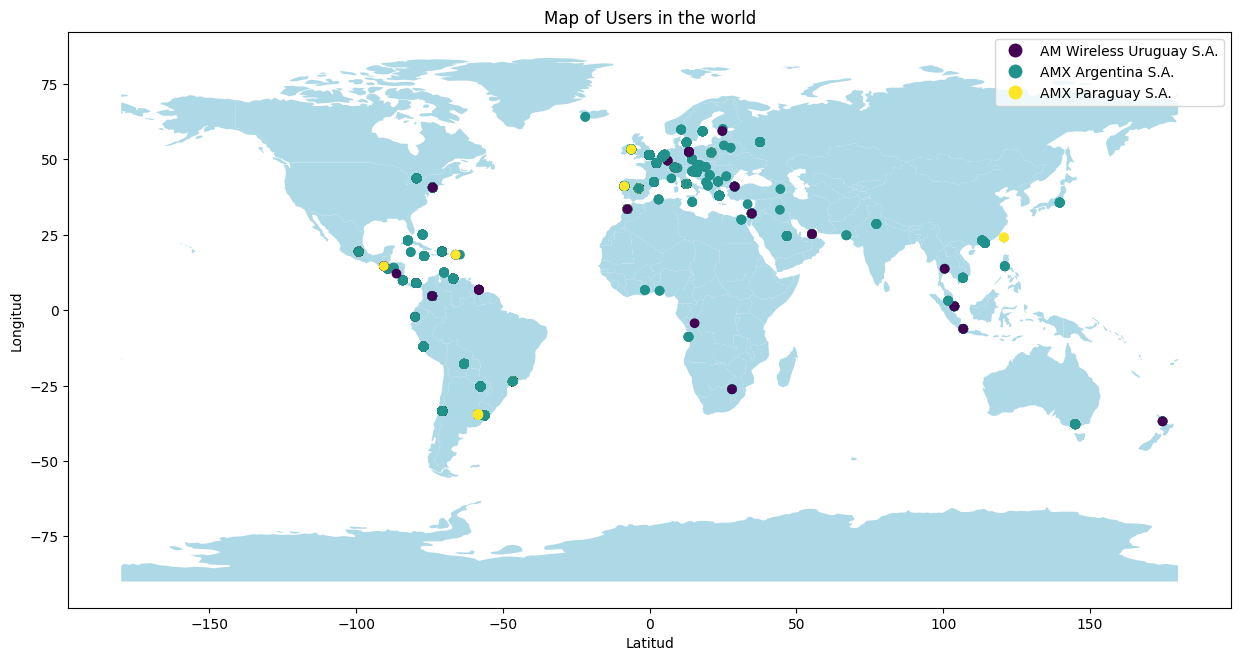

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Add title and labels
ax.set_title('Map of Users in the world')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
worldmap.plot(color="lightblue", ax=ax)
geodf.plot(column='HomeName', cmap='viridis', legend=True, ax=ax)

## Heatmap con variables de interes

Se observan buenas correlaciones entre:
- rsrp_signal --> SQI,SSI_Reg,SSI_Data,SSI_Voice
- throughput_av_trip --> SSI_Voice,SSI_Data,SSI_Reg

Se detectará despues si alguna es función muy directa de otra.

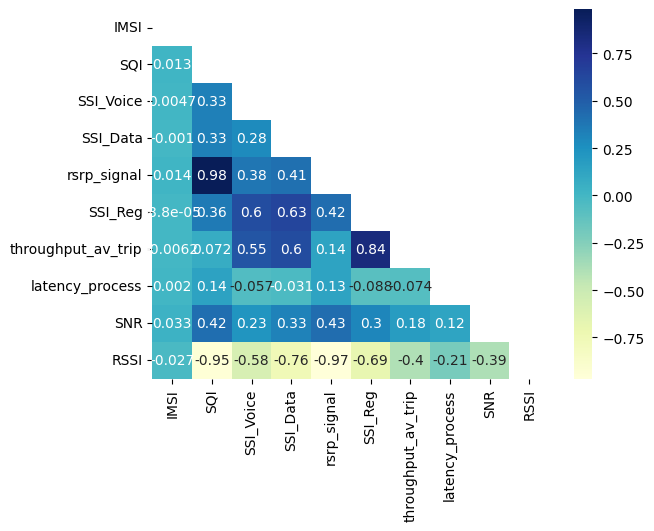

In [45]:
## Heatmap entre las variables de Calidad de Servicio ##
import seaborn as sns
import matplotlib.pyplot as mp
import numpy as np
import scipy.stats as st

seleccion = df[['IMSI','SQI','SSI_Voice','SSI_Data','rsrp_signal','SSI_Reg','throughput_av_trip','latency_process','SNR','RSSI']]

#corr =txnd.corr(numeric_only=True)
corr =seleccion.corr(numeric_only=True)

matrix = np.triu(corr)
dataplot = sns.heatmap(corr,cmap="YlGnBu",annot=True, mask=matrix)
mp.show()

## Gráficos de Barras

## Top 10 de usuarios registrados x el mundo
Se observa la cantidad de usuarios registrados en los distintos paises en el periodo que se tomó la muestra

In [46]:
## Top 10 de usuarios registrados x el mundo ##
top_n= df.VisitedZoneName3L.value_counts(ascending=False).head(15)

<BarContainer object of 15 artists>

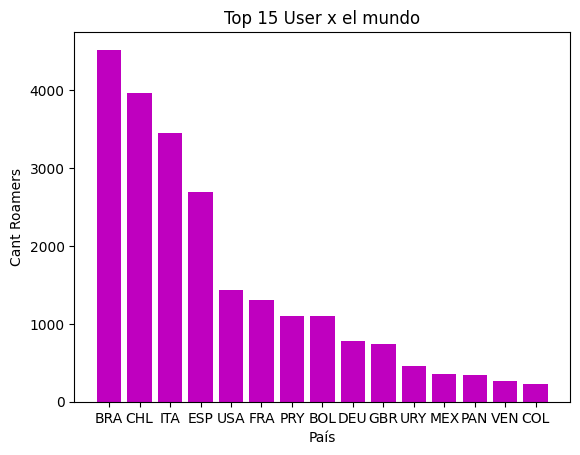

In [47]:
plt.xlabel("País")
plt.ylabel("Cant Roamers")
plt.title('Top 15 User x el mundo')
plt.bar(top_n.index,top_n.values, color='m')

## lineas (IMSI) con mas de 10 intentos de registración
Podemos observar los intentos de registración de varios usuarios qu son rechazados por la plataforma, esta es una opertunidad de mejora ya que detectando estos casos se puede ofrecer un servicio adecuado para el cliente.

In [48]:
## lineas (IMSI) con mas de 10 intentos de registración ##

df_2= df[df['Retry_Count']>10]
df_2.loc[:, ['IMSI', 'Retry_Count']]

# Suponiendo que df es su DataFrame y las columnas que desea comparar son "IMSI" y "Retry_Count"
tabla_contingencia = pd.crosstab(df_2['IMSI'], df_2['Retry_Count'])
# Sumar las filas de la tabla de contingencia
coincidencias_por_valor = tabla_contingencia.sum(axis=0)
coincidencias_por_valor =coincidencias_por_valor.sort_values(ascending=False)
coincidencias_por_valor = coincidencias_por_valor.head(10)
coincidencias_por_valor

Retry_Count
11    347
12    269
13    235
14    176
16    147
15    144
18     98
19     93
17     91
20     60
dtype: int64

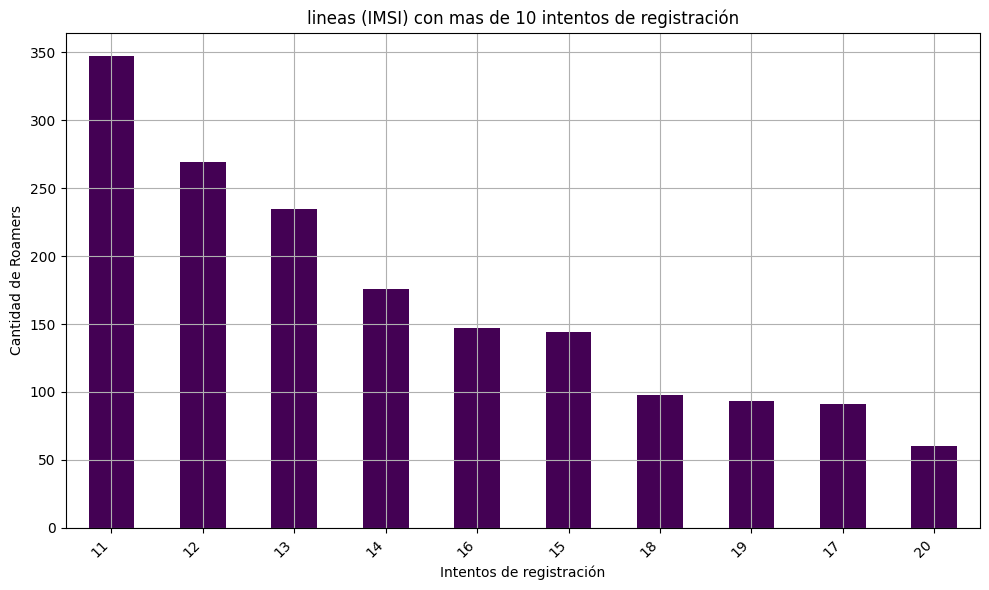

In [49]:
## lineas (IMSI) con mas de 10 intentos de registración ##
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
coincidencias_por_valor.plot(kind='bar',cmap='viridis')

# Add labels and title
plt.xlabel('Intentos de registración')
plt.ylabel('Cantidad de Roamers')
plt.title('lineas (IMSI) con mas de 10 intentos de registración')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.grid(True)
plt.tight_layout()
plt.show()

## Top 15 de tipos de usuarios registrados x el mundo
Se observa la cantidad de usuarios registrados en el periodo de muestra, según su tipo, por ejemplo:

- VIP: Clientes importantes
- GPRS: Solo datos
- Plan Prepago
- AVL: SIM en camiones
- Default: Resto de los mortales

In [50]:
## Top 15 de tipos de usuarios registrados x el mundo ##

df_2= df[df['AppliedCosName']!='zonedefault']
df_2.loc[:, ['IMSI', 'AppliedCosName']]

tabla_contingencia = pd.crosstab(df_2['IMSI'], df_2['AppliedCosName'])
# Sumar las filas de la tabla de contingencia
coincidencias_por_valor = tabla_contingencia.sum(axis=0)
coincidencias_por_valor =coincidencias_por_valor.sort_values(ascending=False)
coincidencias_por_valor = coincidencias_por_valor.head(15)
coincidencias_por_valor

AppliedCosName
VIP            193
AVL            106
PrepagoTEMP     50
VIPBR            2
VIPUS            1
dtype: int64

<BarContainer object of 5 artists>

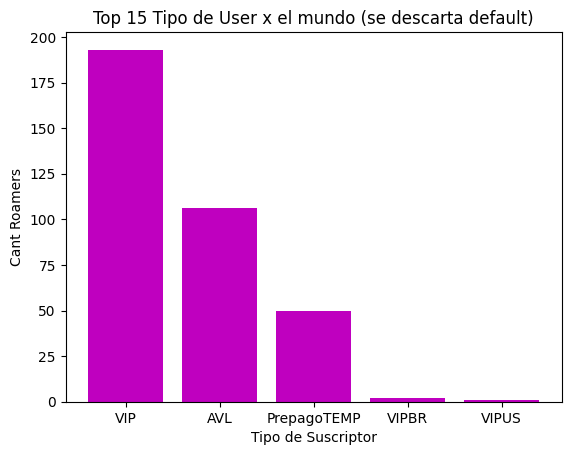

In [51]:
plt.xlabel("Tipo de Suscriptor")
plt.ylabel("Cant Roamers")
plt.title('Top 15 Tipo de User x el mundo (se descarta default)')
plt.bar(coincidencias_por_valor.index,coincidencias_por_valor.values, color='m')

## Por donde andan los usuarios VIP?

In [52]:
## Por donde andan los usuarios VIP? ##

df_2= df[df['AppliedCosName']=='VIP']
top_n= df_2.VisitedZoneName3L.value_counts(ascending=False).head(15)

<BarContainer object of 15 artists>

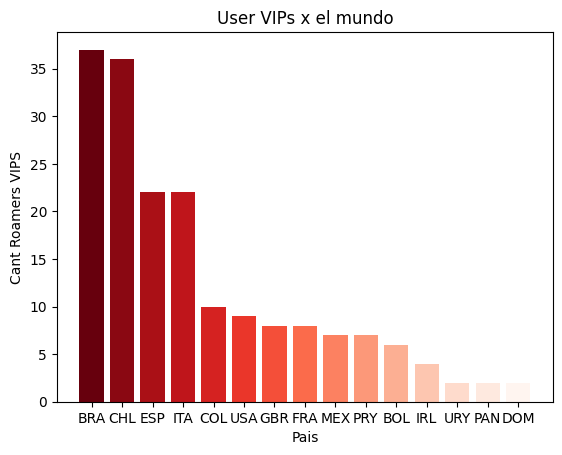

In [53]:
plt.xlabel("Pais")
plt.ylabel("Cant Roamers VIPS")
plt.title('User VIPs x el mundo')
# Define gradient colors
cmap = plt.cm.get_cmap('Reds_r')  # Choose a colormap
colors = cmap(np.linspace(0, 1, len(top_n)))  # Generate gradient colors
plt.bar(top_n.index,top_n.values, color = colors)

## Cantidad de usuarios por Tecnologia de RED

Por ejemplo:

. GSM UL allowed because of GPRS attach    
. First time LTE ULR                       
. GPRS UL allowed because of GSM attach    


In [54]:
## Cantidad de usuarios por RED? ##

df_2= df[df['ReasonCodeDesc']!='Network is forbidden']
df_2.loc[:, ['IMSI', 'ReasonCodeDesc']]

# Suponiendo que df es su DataFrame y las columnas que desea comparar son "IMSI" y "Retry_Count"
tabla_contingencia = pd.crosstab(df_2['IMSI'], df_2['ReasonCodeDesc'])
# Sumar las filas de la tabla de contingencia
coincidencias_por_valor = tabla_contingencia.sum(axis=0)
coincidencias_por_valor =coincidencias_por_valor.sort_values(ascending=False)
coincidencias_por_valor = coincidencias_por_valor.head(5)
coincidencias_por_valor

ReasonCodeDesc
GSM UL allowed because of GPRS attach    8419
First time LTE ULR                       4149
GPRS UL allowed because of GSM attach    3963
First time GPRS UL                       2551
RDC allowed the subscriber               1946
dtype: int64

<BarContainer object of 5 artists>

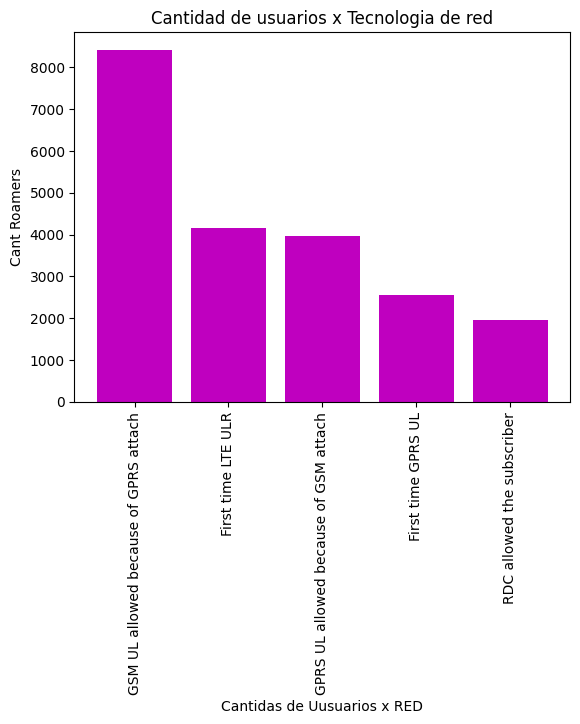

In [55]:
plt.xlabel("Cantidas de Uusuarios x RED")
plt.ylabel("Cant Roamers")
plt.title('Cantidad de usuarios x Tecnologia de red')
plt.xticks(rotation=90)
plt.bar(coincidencias_por_valor.index,coincidencias_por_valor.values, color='m')

## Histogramas

Por ejemplo observamos distribución normal en algunas variables por ejemplo SQI y rsrp_signal y presencia de outlier a tratar a posterior

(array([5.32821466e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.46105254e-04, 1.07684209e-04, 2.15368418e-04, 5.38421045e-04,
        1.61526314e-03, 7.86094726e-03, 1.11991577e-02, 4.47966310e-02,
        9.57312618e-02, 1.20498630e-01, 1.38158840e-01, 1.65510629e-01,
        1.92862418e-01, 2.47242944e-01, 2.71471891e-01, 2.35828418e-01,
        2.07830523e-01, 1.82524734e-01, 1.60449471e-01, 1.25344419e-01,
        7.09638938e-02, 3.66126311e-02, 2.82132628e-02, 1.64756840e-02,
        9.69157881e-03, 4.30736836e-03]),
 array([ 0.        ,  0.34369935,  0.68739869,  1.03109804,  1.37479739,
         1.71849673,  2.06219608,  2.40589542,  2.74959477,  3.09329412,
         3.43699346,  3.78069281,  4.12439216,  4.4680915 ,  4.81179085,
         5.1554902 ,  5.49918954,  5.84288889,  6.18658824,  6.53028758,
         6.87398693,  7.21768627,  7.56138562,  7.90508497,  8.24878431,
         8.59248366,  8.93618301,  9.27988235,  9.6235817 ,  9.96728105,
        10.31098

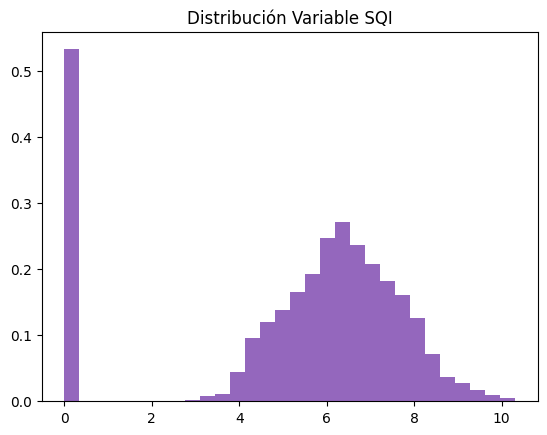

In [56]:
import matplotlib.pyplot as plt

plt.title('Distribución Variable SQI')
plt.hist(df.SQI,bins=30,density=True, color='tab:purple')

(array([2.65926842e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.12863050e-03, 2.42924278e-02, 8.97529966e-02,
        1.00501858e-01, 1.56825895e-01, 2.55876657e-01, 2.06270659e-01,
        1.76980011e-01, 1.14529123e-01, 3.93408344e-02, 1.46184521e-02,
        4.46077767e-03, 1.07488619e-03, 0.00000000e+00, 5.37443093e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.83698784e-04]),
 array([ 0.        ,  0.68864951,  1.37729902,  2.06594853,  2.75459804,
         3.44324755,  4.13189706,  4.82054657,  5.50919608,  6.19784559,
         6.8864951 ,  7.57514461,  8.26379412,  8.95244363,  9.64109314,
        10.32974265, 11.01839216, 11.70704167, 12.39569118, 13.08434069,
        13.7729902 , 14.46163971, 15.15028922, 15.83893873, 16.52758824,
        17.21623775, 17.90488725, 18.59353676, 19.28218627, 19.97083578,
        20.65948

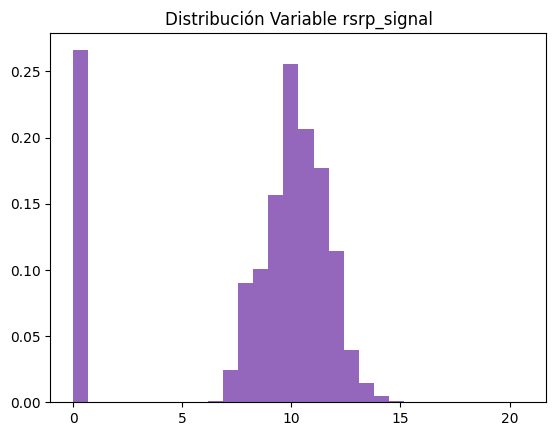

In [57]:
plt.title('Distribución Variable rsrp_signal')
plt.hist(df.rsrp_signal,bins=30,density=True, color='tab:purple')

(array([0.44654355, 0.06379194, 0.056557  , 0.06425871, 0.0627806 ,
        0.06612579, 0.06231383, 0.06565902, 0.07048231, 0.07569458,
        0.08059567, 0.07234939, 0.06814846, 0.06807066, 0.06993774,
        0.08020669, 0.07017113, 0.07701709, 0.09903309, 0.07164924,
        0.06480327, 0.05468992, 0.04247609, 0.03648588, 0.03158479,
        0.02870637, 0.02217159, 0.01797066, 0.00910202, 0.00256724]),
 array([ 0.        ,  0.47575   ,  0.9515    ,  1.42725   ,  1.903     ,
         2.37875   ,  2.8545    ,  3.33025   ,  3.806     ,  4.28175   ,
         4.7575    ,  5.23325   ,  5.709     ,  6.18475   ,  6.6605    ,
         7.13625   ,  7.61199999,  8.08774999,  8.56349999,  9.03924999,
         9.51499999,  9.99074999, 10.46649999, 10.94224999, 11.41799999,
        11.89374999, 12.36949999, 12.84524999, 13.32099999, 13.79674999,
        14.27249999]),
 <BarContainer object of 30 artists>)

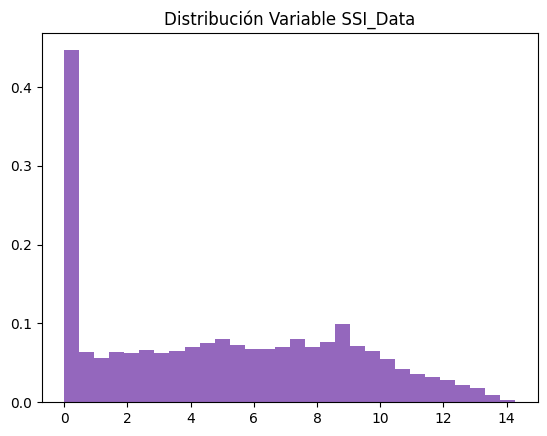

In [58]:
plt.title('Distribución Variable SSI_Data')
plt.hist(df.SSI_Data,bins=30,density=True, color='tab:purple')

## Bivariados

## Scatter plot de la variable HomeName se observa una prevalescencia notable de usuarios de Argentina

Text(0.5, 1.0, 'Bivariados')

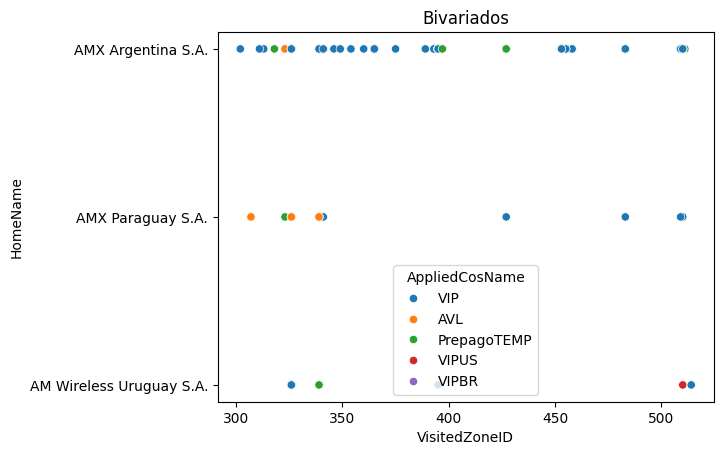

In [59]:
df_2= df[df['AppliedCosName']!='zonedefault']
sns.scatterplot(df_2,x='VisitedZoneID',y='HomeName',hue='AppliedCosName')
plt.title('Bivariados')

## Gráfica SQI vs throughput_av_trip
Se observa tendencia lineal con outlier a tratar

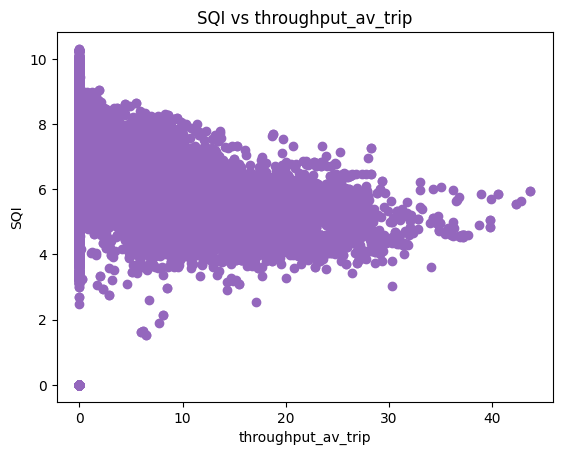

In [60]:
X= 'throughput_av_trip'
Y= 'SQI'

plt.xlabel(X)
plt.ylabel(Y)
plt.title(Y +' vs ' + X)
plt.plot(df[X],df[Y],'o', color='tab:purple')

## Gráfica SSI_Dat vs throughput_av_trip
Se observa tendencia lineal con outlier a tratar

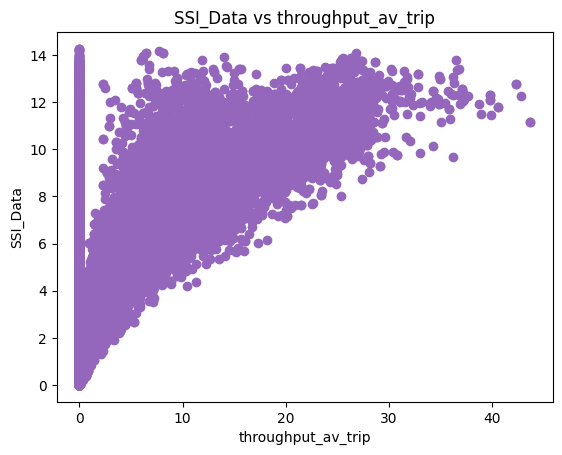

In [61]:
X= 'throughput_av_trip'
Y= 'SSI_Data'

plt.xlabel(X)
plt.ylabel(Y)
plt.title(Y +' vs ' + X)
#plt.plot(df[X],df[Y],'o', color='tab:purple')
plt.plot(df[X],df[Y],'o', color='tab:purple')

## Gráfica SSI_Reg vs throughput_av_trip
Se observa tendencia lineal con outlier a tratar

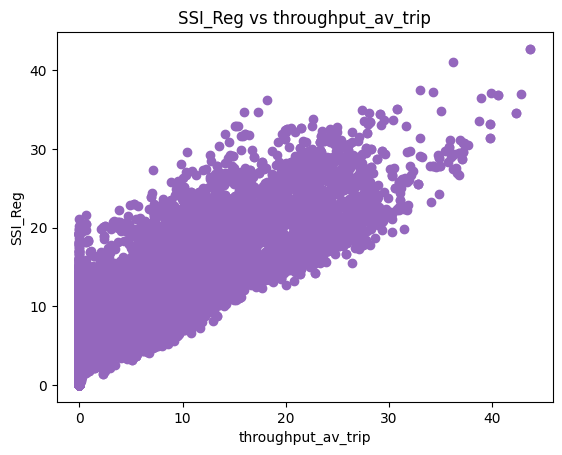

In [62]:
X= 'throughput_av_trip'
Y= 'SSI_Reg'

plt.xlabel(X)
plt.ylabel(Y)
plt.title(Y +' vs ' + X)
#plt.plot(df[X],df[Y],'o', color='tab:purple')
plt.plot(df[X],df[Y],'o', color='tab:purple')

## A continuación algunas gráficas de variables para sacar conclusiones a posterior


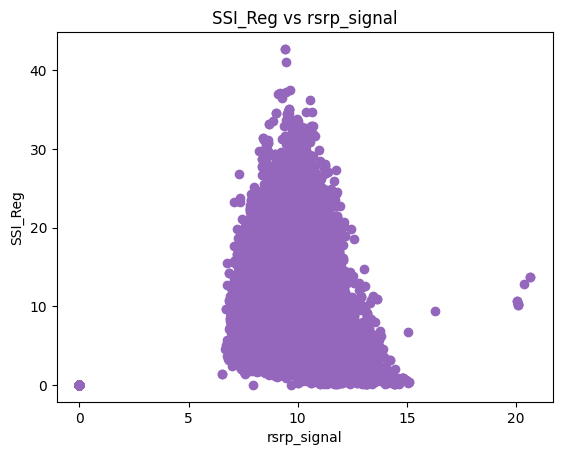

In [63]:
X= 'rsrp_signal'
Y= 'SSI_Reg'

plt.xlabel(X)
plt.ylabel(Y)
plt.title(Y +' vs ' + X)
plt.plot(df[X],df[Y],'o', color='tab:purple')

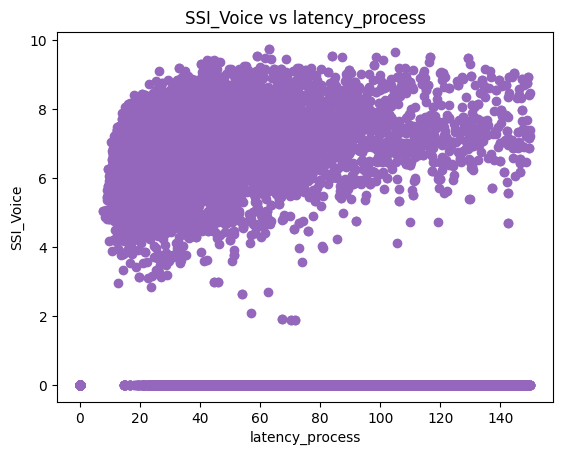

In [64]:
dflm1000= df[(df['latency_process'] < 150)]

X= 'latency_process'
Y= 'SSI_Voice'

plt.xlabel(X)
plt.ylabel(Y)
plt.title(Y +' vs ' + X)
plt.plot(dflm1000[X],dflm1000[Y],'o', color='tab:purple')

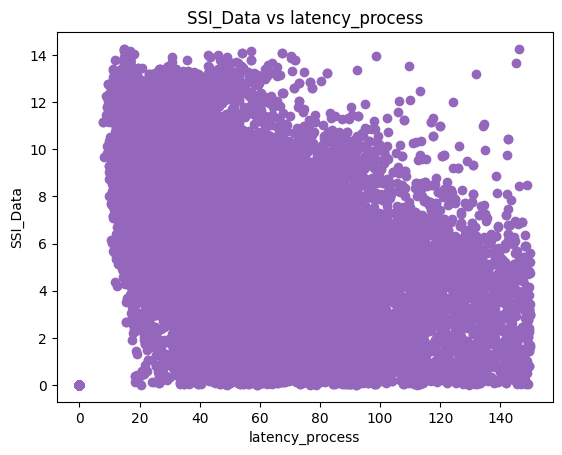

In [65]:
dflm1000= df[(df['latency_process'] < 150)]

X= 'latency_process'
Y= 'SSI_Data'

plt.xlabel(X)
plt.ylabel(Y)
plt.title(Y +' vs ' + X)
plt.plot(dflm1000[X],dflm1000[Y],'o', color='tab:purple')

## Algunas estadísticas para conclusiones a posterior

In [66]:
dflm1000.SSI_Reg.describe()

count    25108.000000
mean         7.656000
std          6.615569
min          0.000000
25%          3.315318
50%          6.291146
75%         10.669315
max         42.760556
Name: SSI_Reg, dtype: float64

In [67]:
df.SQI.describe()

count    27019.000000
mean         5.229011
std          2.727186
min          0.000000
25%          4.576176
50%          6.059853
75%          7.050264
max         10.310980
Name: SQI, dtype: float64

In [68]:
df.SSI_Data.describe()

count    27019.000000
mean         4.985128
std          3.905822
min          0.000000
25%          1.070000
50%          4.855500
75%          8.304000
max         14.272500
Name: SSI_Data, dtype: float64